# Run the next cell if running on the AWS Cluaster

In [ ]:
import os
import sys #current as of 9/26/2015

#spark_home = os.environ['SPARK_HOME'] = '/Users/jshanahan/Dropbox/Lectures-UC-Berkeley-ML-Class-2015/spark-1.6.1-bin-hadoop2.6/'
#if not spark_home:
#    raise ValueError('SPARK_HOME enviroment variable is not set')
#sys.path.insert(0,os.path.join(spark_home,'python'))
#sys.path.insert(0,os.path.join(spark_home,'python/lib/py4j-0.9-src.zip'))

# First, we initialize the Spark environment
import findspark
findspark.init('/usr/lib/spark')

import pyspark
from pyspark.sql import SQLContext

# We can give a name to our app (to find it in Spark WebUI) and configure execution mode
# In this case, it is local multicore execution with "local[*]"
app_name = "example-logs"
master = "local[*]"
conf = pyspark.SparkConf().setAppName(app_name).setMaster(master)
sc = pyspark.SparkContext(conf=conf)
sqlContext = SQLContext(sc)




print(sc)
print(sqlContext)


# Import some libraries to work with dates
import dateutil.parser
import dateutil.relativedelta as dateutil_rd`

# Run the next cell if running Locally¶



In [1]:
import os
import sys #current as of 9/26/2015

# spark_home = os.environ['SPARK_HOME'] = '/Users/jshanahan/Dropbox/Lectures-UC-Berkeley-ML-Class-2015/spark-1.6.1-bin-hadoop2.6/'
spark_home = os.environ['SPARK_HOME'] = '/Users/jshanahan/Dropbox/Lectures-UC-Berkeley-ML-Class-2015/spark-1.6.1-bin-hadoop2.6/'
if not spark_home:
    raise ValueError('SPARK_HOME enviroment variable is not set')
sys.path.insert(0,os.path.join(spark_home,'python'))
sys.path.insert(0,os.path.join(spark_home,'python/lib/py4j-0.9-src.zip'))

# First, we initialize the Spark environment

import findspark
#findspark.init()

import pyspark
from pyspark.sql import SQLContext

# We can give a name to our app (to find it in Spark WebUI) and configure execution mode
# In this case, it is local multicore execution with "local[*]"
app_name = "example-logs"
master = "local[*]"
conf = pyspark.SparkConf().setAppName(app_name).setMaster(master)
sc = pyspark.SparkContext(conf=conf)
sqlContext = SQLContext(sc)


print(sc)
print(sqlContext)


# Import some libraries to work with dates
import dateutil.parser
import dateutil.relativedelta as dateutil_rd

In [1]:
import os
import sys #current as of 9/26/2015
import pyspark
from pyspark.sql import SQLContext
# We can give a name to our app (to find it in Spark WebUI) and configure execution mode
# In this case, it is local multicore execution with "local[*]"
app_name = "example-logs"
master = "local[*]"
conf = pyspark.SparkConf().setAppName(app_name).setMaster(master)
sc = pyspark.SparkContext(conf=conf)
sqlContext = SQLContext(sc)
print(sc)
print(sqlContext)
# Import some libraries to work with dates
import dateutil.parser
import dateutil.relativedelta as dateutil_rd

# Beginning of Quiz

In [2]:
%%writefile wordcount.txt
hello hi hi hallo
bonjour hola hi ciao
nihao konnichiwa ola
hola nihao hello

Writing wordcount.txt


In [3]:
cat wordcount.txt

hello hi hi hallo
bonjour hola hi ciao
nihao konnichiwa ola
hola nihao hello

## NOTES on Inputs to Spark

http://spark.apache.org/docs/latest/programming-guide.html
All of Spark’s file-based input methods, including textFile, support running on directories, compressed files, and wildcards as well. For example, you can use textFile("/my/directory"), textFile("/my/directory/*.txt"), and textFile("/my/directory/*.gz").

The textFile method also takes an optional second argument for controlling the number of partitions of the file. By default, Spark creates one partition for each block of the file (blocks being 64MB by default in HDFS), but you can also ask for a higher number of partitions by passing a larger value. Note that you cannot have fewer partitions than blocks.

In [2]:
rdd = sc.parallelize('wordcount.txt')  #distributes the string
rdd.first()
#rdd.count()

'w'

In [3]:
rdd = sc.textFile('wordcount.txt')  #create an RDD
rdd.count()

4

In [4]:
rdd.first()

'hello hi hi hallo'

In [6]:
#Count words in file/directory
logFileNAME = 'wordcount.txt'
text_file = sc.textFile(logFileNAME)
counts = text_file.flatMap(lambda line: line.split(" ")) \
             .map(lambda word: (word, 1)) \
             .reduceByKey(lambda a, b: a + b)
wordCounts = counts.collect()
for v in counts.collect():
    print (v)

('nihao', 2)
('hola', 2)
('konnichiwa', 1)
('hello', 2)
('ola', 1)
('hallo', 1)
('bonjour', 1)
('ciao', 1)
('hi', 3)


In [8]:
print (wordCounts)

[('nihao', 2), ('hola', 2), ('konnichiwa', 1), ('hello', 2), ('ola', 1), ('hallo', 1), ('bonjour', 1), ('ciao', 1), ('hi', 3)]


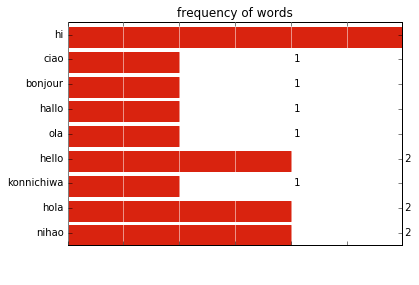

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline


def plot(delays, measureStr):
    """
    Show a bar chart of the total delay per airline
    """
    airlines = [d[0] for d in delays]
    minutes  = [d[1] for d in delays]
    index    = list(range(len(airlines)))

    fig, axe = plt.subplots()
    bars = axe.barh(index, minutes)

    # Add the total minutes to the right
    for idx, air, min in zip(index, airlines, minutes):
        if min > 0:
            bars[idx].set_color('#d9230f')
            axe.annotate(" %0.0f" % min, xy=(min+1, idx+0.5), va='center')
        else:
            bars[idx].set_color('#469408')
            axe.annotate(" %0.0f" % min, xy=(10, idx+0.5), va='center')

    # Set the ticks
    ticks = plt.yticks([idx+ 0.5 for idx in index], airlines)
    xt = plt.xticks()[0]
    plt.xticks(xt, [' '] * len(xt))

    #minimize chartjunk
    plt.grid(axis = 'x', color ='white', linestyle='-')

    plt.title(measureStr)
    plt.show()



plot(wordCounts[:10], "frequency of words")

__sortByKey([ascending], [numTasks])__	

When called on a dataset of (K, V) pairs where K implements Ordered, returns a dataset of (K, V) pairs sorted by keys in ascending or descending order, as specified in the boolean ascending argument.

In [11]:
wordCounts

[('nihao', 2),
 ('hola', 2),
 ('konnichiwa', 1),
 ('hello', 2),
 ('ola', 1),
 ('hallo', 1),
 ('bonjour', 1),
 ('ciao', 1),
 ('hi', 3)]

In [12]:
#Last 1
wordCounts[8:]

[('hi', 3)]

In [13]:
#first  5
wordCounts[:5]

[('nihao', 2), ('hola', 2), ('konnichiwa', 1), ('hello', 2), ('ola', 1)]

# Quiz: Part 1: Modify the code to sort the word count records in decreasing order of frequency and plot

#your code should procuce something like this
(u'hi', 3)
(u'nihao', 2)
(u'hello', 2)
(u'hola', 2)
(u'hallo', 1)
(u'konnichiwa', 1)
(u'ola', 1)
(u'ciao', 1)
(u'bonjour', 1)

('hi', 3)
('hello', 2)
('nihao', 2)
('hola', 2)
('konnichiwa', 1)
('ola', 1)
('hallo', 1)
('bonjour', 1)
('ciao', 1)


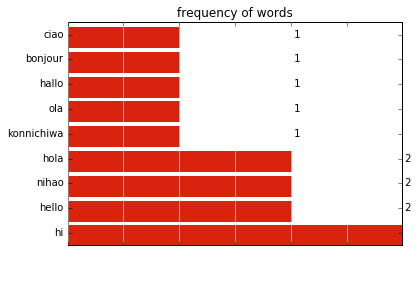

In [23]:
#modify the code to sort the word count records in decreasing order of frequency and plot

text_file = sc.textFile(logFileNAME)
counts = text_file.flatMap(lambda line: line.split(" ")) \
    .map(lambda word: (word, 1)) \
    .reduceByKey(lambda a, b: a + b, 1) \
    .sortBy(lambda a: -a[1])
     
wordCounts = counts.collect()
for v in counts.collect():
    print (v)
    
plot(wordCounts[:10], "frequency of words")



('hi', 3)
('hello', 2)
('nihao', 2)
('hola', 2)
('konnichiwa', 1)
('ola', 1)
('hallo', 1)
('bonjour', 1)
('ciao', 1)


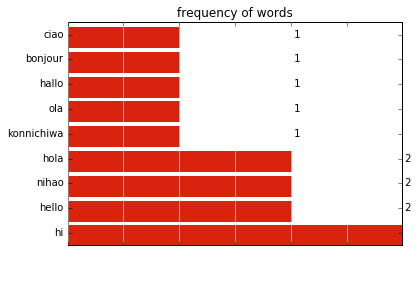

In [39]:
#modify the code to sort the word count records in decreasing order of frequency and plot

text_file = sc.textFile(logFileNAME)
counts = text_file.flatMap(lambda line: line.split(" ")) \
    .map(lambda word: (word, 1)) \
    .reduceByKey(lambda a, b: a + b, 1) \
    .map(lambda x: (x[1], x[0])) \
    .sortByKey(False) \
    .map(lambda x: (x[1], x[0]))
     
wordCounts = counts.collect()
for v in counts.collect():
    print (v)
    
plot(wordCounts[:10], "frequency of words")

('konnichiwa', 1)
('ola', 1)
('hallo', 1)
('bonjour', 1)
('ciao', 1)


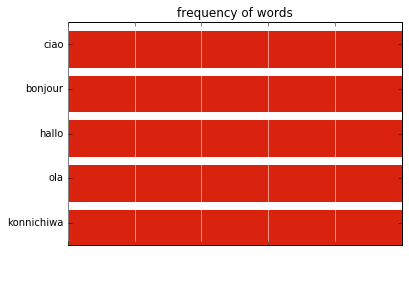

In [52]:
# Quiz: Part 2 Modify the code to produce a list of the 5 rarest words
text_file = sc.textFile(logFileNAME)
counts = text_file.flatMap(lambda line: line.split(" ")) \
    .map(lambda word: (word, 1)) \
    .reduceByKey(lambda a, b: a + b, 1) \
    .map(lambda x: (x[1], x[0])) \
    .sortByKey(True) \
    .map(lambda x: (x[1], x[0])) \
    .filter(lambda x: x[1]<2)
     
wordCounts = counts.collect()
for v in counts.collect():
    print (v)
    
plot(wordCounts[:10], "frequency of words")